In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# Data Preprocessing

In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

# Text Preprocessing

In [6]:
import re
import string

Convert uppercase to lovercase

In [7]:
data['tweet'].head()

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [8]:
data['tweet'] = data['tweet'].apply(lambda x:" ".join(x.lower()for x in x.split()))

In [9]:
data['tweet'].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove Stopwords

In [10]:
!pip install nltk
import nltk


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
nltk.download('stopwords',download_dir='../static/model')
with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
data['tweet'] = data['tweet'].apply(lambda x:" ".join(x for x in x.split()if x not in sw))

Remove Links

In [14]:
data['tweet']= data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE)for x in x.split()))

In [15]:
data['tweet'].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally transparant silicon case ^^ thanks unc...
2    love this! would go? #talk #makememories #unpl...
3    i'm wired know i'm george made way ;) #iphone ...
4    amazing service! apple even talk question unle...
Name: tweet, dtype: object

Remove punctuations

In [16]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

data['tweet'] = data['tweet'].apply(remove_punctuations)

In [17]:
data['tweet'].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally transparant silicon case  thanks uncle...
2    love this would go talk makememories unplug re...
3    im wired know im george made way  iphone cute ...
4    amazing service apple even talk question unles...
Name: tweet, dtype: object

Remove Numbers

In [18]:
data['tweet'] = data['tweet'].str.replace('\d+','',regex=True)

In [19]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    completely love new iphone emojis iphone apple...
7912    tune in turn on drop out  gtd one app  mobile ...
7913    ok galaxy crashed one day wait til monday skyr...
7914    gain followers rt must follow follow back foll...
7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely  year old neighbor ipad morning...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Stemming

In [20]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

data['tweet'] = data['tweet'].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

In [21]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love thi would go talk makememori unplug relax...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl even talk question unless pay...
Name: tweet, dtype: object

In [23]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love thi would go talk makememori unplug relax...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl even talk question unless pay...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


# Building Vacabulary

In [27]:
from collections import Counter
vocab = Counter()

In [28]:
vocab.update(['java','python','c++','python'])

In [29]:
vocab

Counter({'python': 2, 'java': 1, 'c++': 1})

In [30]:
# Re initialising object

In [31]:
from collections import Counter
vocab = Counter()

In [32]:
vocab

Counter()

In [34]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [36]:
len(vocab)

16019

In [37]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'me': 380,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         's': 336,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'inst

In [40]:
sorted_vocab = sorted(vocab.items(), key=lambda x:x[1])
converted_dict = dict(sorted_vocab)

In [41]:
sorted_vocab

[('pregnanc', 1),
 ('sonyexperias…', 1),
 ('makememori', 1),
 ('georg', 1),
 ('daventri', 1),
 ('evemun', 1),
 ('mcmafia', 1),
 ('spectr', 1),
 ('pictwittercompjiwqwtc', 1),
 ('minit', 1),
 ('machineri', 1),
 ('drinkyourhaterad', 1),
 ('bandwagon', 1),
 ('cellcom', 1),
 ('idontwantto', 1),
 ('theori', 1),
 ('shaqlockholm', 1),
 ('samlouis', 1),
 ('lunchtim', 1),
 ('deepellum', 1),
 ('dalla', 1),
 ('bigd', 1),
 ('rxm', 1),
 ('…pictwittercomgfknyecj', 1),
 ('truthbetold', 1),
 ('blackberrypictwittercomzpggdcazn', 1),
 ('fuckingpiss', 1),
 ('publish', 1),
 ('png', 1),
 ('thumbnail', 1),
 ('mutitaedibleartgmailcompictwittercomjhwphfbgt', 1),
 ('waiter', 1),
 ('thiphon', 1),
 ('prior', 1),
 ('myloss', 1),
 ('cannon', 1),
 ('piggi', 1),
 ('southerncharm', 1),
 ('americanidol', 1),
 ('thislif', 1),
 ('hoggpictwittercommnogp', 1),
 ('direzionevertical', 1),
 ('…pictwittercomcxifijjg', 1),
 ('cottd', 1),
 ('nswrl', 1),
 ('pipelin', 1),
 ('duuud', 1),
 ('sirriious', 1),
 ('lightskin', 1),
 ('cur

In [42]:
converted_dict

{'pregnanc': 1,
 'sonyexperias…': 1,
 'makememori': 1,
 'georg': 1,
 'daventri': 1,
 'evemun': 1,
 'mcmafia': 1,
 'spectr': 1,
 'pictwittercompjiwqwtc': 1,
 'minit': 1,
 'machineri': 1,
 'drinkyourhaterad': 1,
 'bandwagon': 1,
 'cellcom': 1,
 'idontwantto': 1,
 'theori': 1,
 'shaqlockholm': 1,
 'samlouis': 1,
 'lunchtim': 1,
 'deepellum': 1,
 'dalla': 1,
 'bigd': 1,
 'rxm': 1,
 '…pictwittercomgfknyecj': 1,
 'truthbetold': 1,
 'blackberrypictwittercomzpggdcazn': 1,
 'fuckingpiss': 1,
 'publish': 1,
 'png': 1,
 'thumbnail': 1,
 'mutitaedibleartgmailcompictwittercomjhwphfbgt': 1,
 'waiter': 1,
 'thiphon': 1,
 'prior': 1,
 'myloss': 1,
 'cannon': 1,
 'piggi': 1,
 'southerncharm': 1,
 'americanidol': 1,
 'thislif': 1,
 'hoggpictwittercommnogp': 1,
 'direzionevertical': 1,
 '…pictwittercomcxifijjg': 1,
 'cottd': 1,
 'nswrl': 1,
 'pipelin': 1,
 'duuud': 1,
 'sirriious': 1,
 'lightskin': 1,
 'curlyhair': 1,
 'bellypierc': 1,
 'potd…': 1,
 'din’t': 1,
 'attitud': 1,
 'lifeisgood': 1,
 'mylook':

In [38]:
tokens = [key for key in vocab if vocab[key]>10]

In [43]:
len(tokens)

1180

In [44]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 's',
 'love',
 'thi',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'to',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'i

In [45]:
def save_vocabulary(lines,filename):
    data = '\n'.join(lines)
    file = open(filename,'w',encoding='utf-8')
    file.write(data)
    file.close()
save_vocabulary(tokens,'../Static/Model/vocabulary.txt')

# Divide Dataset

In [48]:
!pip install scikit-learn
x = data['tweet']
y= data['label']

from sklearn.model_selection import train_test_split

                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB 1.3 MB/s eta 0:00:07
                                              0.0/8.3 MB 326.8 kB/s eta 0:00:26
                                              0.1/8.3 MB 465.5 kB/s eta 0:00:18
                                              0.1/8.3 MB 357.2 kB/s eta 0:00:24
                                              0.1/8.3 MB 357.2 kB/s eta 0:00:24
                                              0.1/8.3 MB 357.2 kB/s eta 0:00:24
                                              0.1/8.3 MB 357.2 kB/s eta 0:00:24
                                              0.1/8.3 MB 249.0 kB/s eta 0:00:33
                                              0.1/8.3 MB 249.0 kB/s eta 0:00:33
                                              0.1/8.3 MB 249.0 kB/s eta 0:00:33
                                              0.1/8.3 MB 266.2 kB/s eta 0:00:31
                                              0.2/8


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [52]:
x_train.shape

(6336,)

In [53]:
x_test.shape

(1584,)

### Vectorization

In [54]:
def vectorizer(ds,vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst =np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i]=1
                
        vectorized_lst.append(sentence_lst)
    vectorized_lst_new = np.asarray(vectorized_lst,dtype=np.float32)
    return vectorized_lst_new   

vectorized_x_train=vectorizer(x_train,tokens)
vectorized_x_test=vectorizer(x_test,tokens)

In [68]:
x_test.shape

(1584,)

In [58]:
y_train.value_counts()

label
0    4727
1    1609
Name: count, dtype: int64

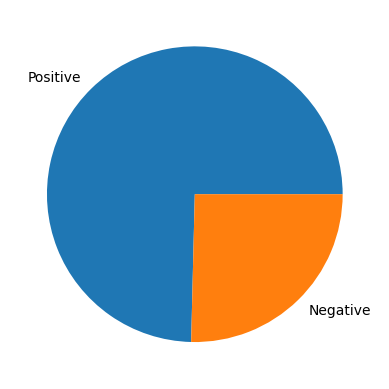

In [60]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=["Positive","Negative"])
plt.show()

# Handle imbalance Dataset

In [61]:
!pip install imbalanced.learn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote,y_train_smote = smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_smote,y_train_smote)

                                              0.0/226.0 kB ? eta -:--:--
     -----                                   30.7/226.0 kB 1.3 MB/s eta 0:00:01
     -----                                   30.7/226.0 kB 1.3 MB/s eta 0:00:01
     ----------                            61.4/226.0 kB 544.7 kB/s eta 0:00:01
     ----------                            61.4/226.0 kB 544.7 kB/s eta 0:00:01
     ----------                            61.4/226.0 kB 544.7 kB/s eta 0:00:01
     ----------                            61.4/226.0 kB 544.7 kB/s eta 0:00:01
     ----------                            61.4/226.0 kB 544.7 kB/s eta 0:00:01
     -----------                           71.7/226.0 kB 196.3 kB/s eta 0:00:01
     ---------------                       92.2/226.0 kB 227.6 kB/s eta 0:00:01
     -------------------                  122.9/226.0 kB 266.9 kB/s eta 0:00:01
     -------------------                  122.9/226.0 kB 266.9 kB/s eta 0:00:01
     -------------------                  122.9


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 0       0
1       0
2       0
3       1
4       0
       ..
9449    1
9450    1
9451    1
9452    1
9453    1
Name: label, Length: 9454, dtype: int64


In [62]:
y_train_smote.value_counts()

label
0    4727
1    4727
Name: count, dtype: int64

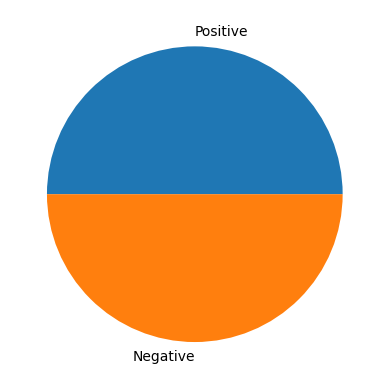

In [63]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]),labels=["Positive","Negative"])
plt.show()

# Model Training and Evaluation

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [66]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

def training_scores(y_act,y_pred):
    acc = round(accuracy_score(y_act,y_pred),3)
    pr = round(precision_score(y_act,y_pred),3)
    rec = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f'Training Score:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def Validation_scores(y_act,y_pred):
    acc = round(accuracy_score(y_act,y_pred),3)
    pr = round(precision_score(y_act,y_pred),3)
    rec = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f'Testing Score:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

# # Logistic Regression

In [74]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=lr.predict(vectorized_x_train_smote)
y_test_pred=lr.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
Validation_scores(y_test,y_test_pred)

Training Score:
	Accuracy = 0.941
	Precision = 0.915
	Recall = 0.973
	F1-Score = 0.943
Testing Score:
	Accuracy = 0.878
	Precision = 0.736
	Recall = 0.837
	F1-Score = 0.783


## Naive Base

In [75]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=mnb.predict(vectorized_x_train_smote)
y_test_pred=mnb.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
Validation_scores(y_test,y_test_pred)

Training Score:
	Accuracy = 0.906
	Precision = 0.867
	Recall = 0.959
	F1-Score = 0.911
Testing Score:
	Accuracy = 0.878
	Precision = 0.71
	Recall = 0.909
	F1-Score = 0.797


# Disision Tree

In [76]:
dtc = DecisionTreeClassifier()
dtc.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=dtc.predict(vectorized_x_train_smote)
y_test_pred=dtc.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
Validation_scores(y_test,y_test_pred)

Training Score:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Score:
	Accuracy = 0.848
	Precision = 0.713
	Recall = 0.71
	F1-Score = 0.712


## Random Forest

In [77]:
rfc = RandomForestClassifier()
rfc.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=rfc.predict(vectorized_x_train_smote)
y_test_pred=rfc.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
Validation_scores(y_test,y_test_pred)

Training Score:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Score:
	Accuracy = 0.867
	Precision = 0.762
	Recall = 0.722
	F1-Score = 0.741


## Support Vector Machine

In [78]:
svm = SVC()
svm.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=svm.predict(vectorized_x_train_smote)
y_test_pred=svm.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
Validation_scores(y_test,y_test_pred)

Training Score:
	Accuracy = 0.977
	Precision = 0.96
	Recall = 0.996
	F1-Score = 0.978
Testing Score:
	Accuracy = 0.884
	Precision = 0.772
	Recall = 0.794
	F1-Score = 0.783


In [79]:
import pickle

with open('../Static/Model/SVM_Model.pickle','wb') as file:
    pickle.dump(svm,file)